<a href="https://colab.research.google.com/github/alistechworld/Machine-Learning-Hands-On-Practice-and-Code/blob/main/Day_22_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imputing Numerical Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [4]:
from google.colab import files
uploaded = files.upload()

Saving titanic_toy (1).csv to titanic_toy (1).csv


In [5]:
df = pd.read_csv("titanic_toy (1).csv")

In [6]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [8]:
df.isnull().mean()

,0
Age,0.198653
Fare,0.050505
Family,0.000000
Survived,0.000000


In [9]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [10]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=2 )

In [11]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [12]:
X_train.isnull().mean()

,0
Age,0.207865
Fare,0.050562
Family,0.000000


In [13]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].mean()

In [14]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(median_fare)

mean_fare = X_train['Fare'].fillna(median_fare)
median_fare = X_train['Fare'].fillna(median_fare)

In [15]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean
845,42.0,7.550,0,42.0,42.0
11,58.0,26.550,0,58.0,58.0
541,9.0,31.275,6,9.0,9.0
683,14.0,46.900,7,14.0,14.0
401,26.0,8.050,0,26.0,26.0


In [16]:
# print('Original Age variable variance: ', X_train['Age'].var())
# print('Age Variance after median imputation: ', X_train['Age_median'].var())
# print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

# # print('Original Fare variable variance: ', X_train['Fare'].var())
# print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
# print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

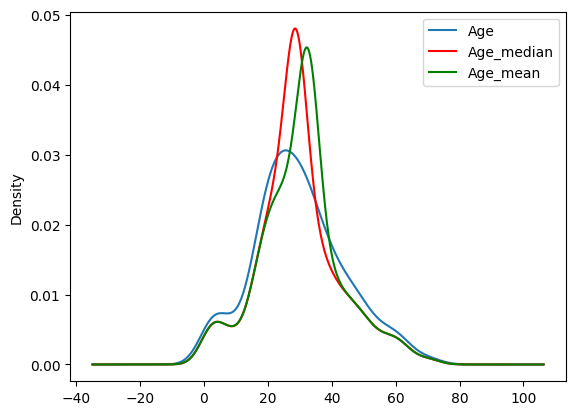

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [23]:
# fig = plt.figure()
# ax = fig.add_subplot(111)

# # original variable distribution
# X_train['Fare'].plot(kind='kde', ax=ax)

# # variable imputed with the median
# X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# # variable imputed with the mean
# X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# # add legends
# lines, labels = ax.get_legend_handles_labels()
# ax.legend(lines, labels, loc='best')

In [24]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513
Fare,70.719262,2448.197914,17.258917,57.957599,49.169279
Family,-6.498901,17.258917,2.735252,-5.112563,-5.237797
Age_median,204.349513,57.957599,-5.112563,161.989566,161.328946
Age_mean,204.349513,49.169279,-5.237797,161.328946,163.134783


In [25]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000
Fare,0.092644,1.000000,0.208268,0.091757,0.077538
Family,-0.299113,0.208268,1.000000,-0.242883,-0.247957
Age_median,1.000000,0.091757,-0.242883,1.000000,0.992420
Age_mean,1.000000,0.077538,-0.247957,0.992420,1.000000


<Axes: >

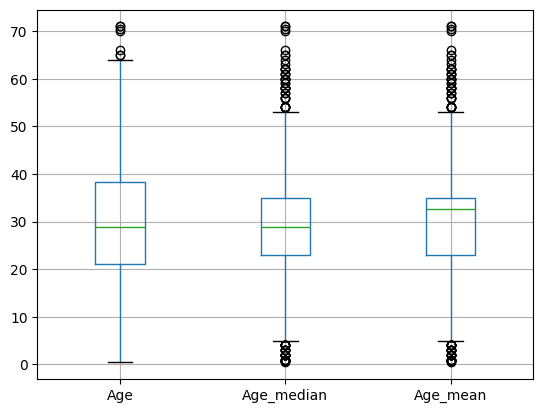

In [26]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

In [28]:
# X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

In [29]:
# Using the SK-Learn

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [31]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy = 'mean')

In [32]:
trf = ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare'])
], remainder='passthrough')

In [33]:
trf.fit(X_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [34]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [35]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [36]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [37]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])